# Data missingness
We want to know what columns contain missing values. There are three categories of missing data: Missing Completely at
Random (MCAR), Missing at Random (MAR), Missing Not at Random (MNAR).

In [3]:
# import libraries
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read in data
root_data_path = Path("data")
eqls_path = Path(str(root_data_path)+"/derived_data/eqls_2011_cleaned.csv").resolve()
eqls_df = pd.read_csv(eqls_path)

eqls_df.head()

,EQLS_Wave,Country,Marital_status,No_of_children,Education_completed,Ruralurban_living,Citizenship__Country,Citizenship__Another_EU_member,Citizenship__A_nonEU_country,Citizenship__Dont_know,...,DV_Anyone_usedwould_have_like_to_use_child_care_last_12_months,DV_Anyone_usedwould_have_like_to_use_long_term_care_last_12_months,DV_No_of_factors_which_made_it_difficult_to_use_child_care,DV_No_of_factors_which_made_it_difficult_to_use_long_term_care,DV_Preferred_working_hours_3_groups,DV_Preferred_working_hours_of_respondents_partner_3_groups,ISO3166_Country_URL,RowID_for_the_UK_Data_service_Public_API,Root_URI_for_a_row_respondent_that_displays_all_data_values_for_a_single_row_via_the_UK_Data_Service_Public_API,Unique_respondent_ID
0,2,1,4.0,0.0,4.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.iso.org/obp/ui/#iso:code:3166:AT,1,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT9000083
1,2,1,4.0,0.0,4.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.iso.org/obp/ui/#iso:code:3166:AT,2,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT9000126
2,2,1,1.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.iso.org/obp/ui/#iso:code:3166:AT,3,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT9000267
3,2,1,2.0,0.0,3.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.iso.org/obp/ui/#iso:code:3166:AT,4,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT9000268
4,2,1,4.0,0.0,3.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.iso.org/obp/ui/#iso:code:3166:AT,5,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT9000427


/Users/clast/Documents/2021_projects/rds-course/.venv/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

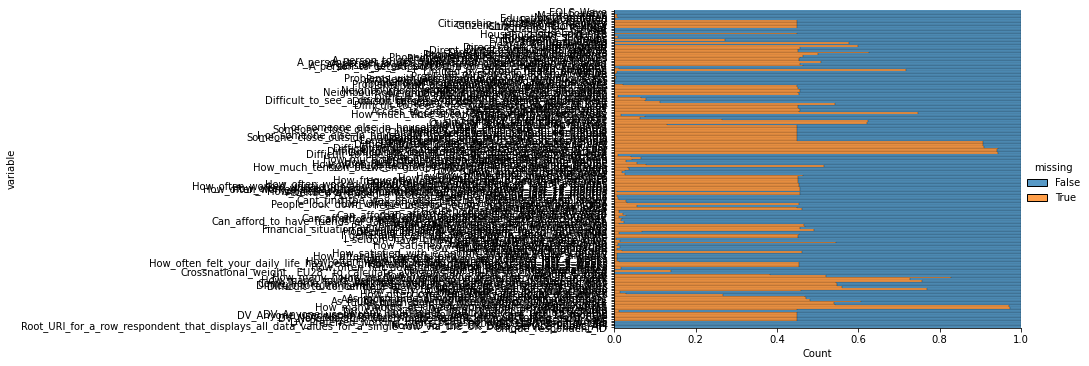

In [4]:
# Following command shows missing/non-missing values in two colors.
plt.figure(figsize=(40,40))
sns.displot(
    data=eqls_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

Almost all feature columns contain missing values and the fraction of rows with missing data can be substantial.
As the visualisation shows there is a large amount of missingness within the 2007 and 2011 data combined.
This visualisation indicates that there is a **relationship** between missingness and its values, missing or non-missing.

Ok, let's try to become a bit more quantitative. We can calculate for every `RowID` and feature column the following information:
- percentage of missing values
- relative fraction of missing values (= number missing values / `EQLS_Wave` for which this `RowID` is present)

In [5]:
# percentage of missing values and columns which have over 50% missingness
eqls_null_counts = eqls_df.isnull().sum() / len(eqls_df)
eqls_null_counts[eqls_null_counts>0.5]

Degree_of_urbanisation                                                     0.577848
Direct_contact_with_children                                               0.599458
Phoneinternet_contact_with_children                                        0.627110
A_person_to_get_support_from_when_looking_for_a_job                        0.507847
Limited_by_chronic_health_problems                                         0.716147
Difficult_to_see_a_doctor_because_of_lack_of_time                          0.541958
How_much_time_spent_on_travelling_to_workstudy                             0.745641
Quality_of_long_term_care_services                                         0.623300
Quality_of_socialmunicipal_housing                                         0.620777
Difficult_to_use_child_care_because_of_cost                                0.906736
Difficult_to_use_child_care_because_of_availability                        0.906459
Difficult_to_use_child_care_because_of_access                              0

In [6]:
# getting the proportion of null values for each wave
eqls_labels = eqls_df.drop(columns=['RowID_for_the_UK_Data_service_Public_API',
                                    'Root_URI_for_a_row_respondent_that_displays_all_data_values_for_a_single_row_via_the_UK_Data_Service_Public_API',
                                    'Unique_respondent_ID'])

pd.set_option('display.max_rows', 100000)
prop_null_counts_per_wave = eqls_labels.groupby("EQLS_Wave").apply(lambda x: x.isnull().sum()/len(x)).transpose()
[prop_null_counts_per_wave[(prop_null_counts_per_wave>0.5).any(1)]]

[EQLS_Wave                                                  2         3
 Citizenship__Country                                1.000000  0.000000
 Citizenship__Another_EU_member                      1.000000  0.000000
 Citizenship__A_nonEU_country                        1.000000  0.000000
 Citizenship__Dont_know                              1.000000  0.000000
 Citizenship__Refusal                                1.000000  0.000000
 Household_size__over_18                             1.000000  0.000000
 Degree_of_urbanisation                              1.000000  0.233110
 Direct_contact_with_children                        1.000000  0.272367
 Direct_contact_with_parents                         1.000000  0.011550
 Direct_contact_with_other_relatives                 1.000000  0.005867
 Direct_contact_with_neighbours                      1.000000  0.005729
 Phoneinternet_contact_with_children                 1.000000  0.322601
 Phoneinternet_contact_with_parents                  1.000000  0

We can see that there are a large amount of completely blank columns in Wave 2 (2007-8) wave, indicating these variables were not present in the survey.
Because we want to make use of the additional variables we will use only Wave 3 data to be able to incorporate these variables.

In [9]:
eqls_2011_path = Path("data/UKDA-7724-csv/csv/eqls_2011.csv").resolve()
eqls_2011_df = pd.read_csv(eqls_2011_path)


eqls_api_map_path = Path(str(root_data_path)+"/UKDA-7724-csv/mrdoc/excel/eqls_api_map.csv").resolve()
eqls_api_map_df = pd.read_csv(eqls_api_map_path,encoding='latin1')
eqls_api_map_df.head()

,VariableName,VariableLabel,Question,TopicValue,KeywordValue,VariableGroupValue
0,Wave,EQLS Wave,EQLS Wave,NaN,NaN,Administrative Variables
1,Y11_Country,Country,Country,Geographies,NaN,Household Grid and Country
2,Y11_Q31,Marital status,Marital status,Social stratification and groupings - Family l...,Marital status,Family and Social Life
3,Y11_Q32,No. of children,Number of children of your own,Social stratification and groupings - Family l...,Children,Family and Social Life
4,Y11_ISCEDsimple,Education completed,Highest level of education completed,Education - Higher and further,Education levels,Education


In [10]:
def create_intuitive_feature_name(data_df, mapping_df):
    if len(data_df.columns) == len(mapping_df):
        old_column_list = list(data_df.columns.values)
        new_col_list = mapping_df['VariableLabel'].str.replace('\s', '_').str.replace('[^\w]','').tolist()
        column_dict = dict(zip(old_column_list, new_col_list))
        return data_df.rename(columns=column_dict)

eqls_2011_df = create_intuitive_feature_name(eqls_2011_df, eqls_api_map_df)

eqls_2011_df.head()

/Users/clast/Documents/2021_projects/rds-course/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,EQLS_Wave,Country,Marital_status,No_of_children,Education_completed,Ruralurban_living,Citizenship__Country,Citizenship__Another_EU_member,Citizenship__A_nonEU_country,Citizenship__Dont_know,...,DV_Anyone_usedwould_have_like_to_use_child_care_last_12_months,DV_Anyone_usedwould_have_like_to_use_long_term_care_last_12_months,DV_No_of_factors_which_made_it_difficult_to_use_child_care,DV_No_of_factors_which_made_it_difficult_to_use_long_term_care,DV_Preferred_working_hours_3_groups,DV_Preferred_working_hours_of_respondents_partner_3_groups,ISO3166_Country_URL,RowID_for_the_UK_Data_service_Public_API,Root_URI_for_a_row_respondent_that_displays_all_data_values_for_a_single_row_via_the_UK_Data_Service_Public_API,Unique_respondent_ID
0,3,15,NaN,0.0,4.0,1.0,1,1,1,2,...,3,3,0,0,4,4,https://www.iso.org/obp/ui/#iso:code:3166:IT,35635,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT1189423
1,3,15,4.0,0.0,4.0,2.0,1,1,2,1,...,3,3,0,0,4,4,https://www.iso.org/obp/ui/#iso:code:3166:IT,35636,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT1156013
2,3,15,4.0,0.0,3.0,2.0,2,1,1,1,...,3,3,0,0,4,4,https://www.iso.org/obp/ui/#iso:code:3166:IT,35637,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT1030307
3,3,15,3.0,0.0,3.0,2.0,2,1,1,1,...,3,3,0,0,4,4,https://www.iso.org/obp/ui/#iso:code:3166:IT,35638,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT1057215
4,3,15,4.0,0.0,4.0,3.0,2,1,1,1,...,3,3,0,0,4,4,https://www.iso.org/obp/ui/#iso:code:3166:IT,35639,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT1037718


In [17]:
eqls_2011_labels = eqls_2011_df.drop(columns=['RowID_for_the_UK_Data_service_Public_API',
                                              'Root_URI_for_a_row_respondent_that_displays_all_data_values_for_a_single_row_via_the_UK_Data_Service_Public_API',
                                              'Unique_respondent_ID'])

prop_null_counts_wave_3 = eqls_2011_labels.groupby("EQLS_Wave").apply(lambda x: x.isnull().sum()/len(x)).transpose()
[prop_null_counts_wave_3[(prop_null_counts_wave_3>0.5).any(1)]]

[EQLS_Wave                                                  3
 Limited_by_chronic_health_problems                  0.710835
 How_much_time_spent_on_travelling_to_workstudy      0.537927
 Difficult_to_use_child_care_because_of_cost         0.830576
 Difficult_to_use_child_care_because_of_availabi...  0.830072
 Difficult_to_use_child_care_because_of_access       0.828880
 Difficult_to_use_child_care_because_of_quality_...  0.834013
 Difficult_to_use_long_term_care_because_of_cost     0.895339
 Difficult_to_use_long_term_care_because_of_avai...  0.894330
 Difficult_to_use_long_term_care_because_of_access   0.894949
 Difficult_to_use_long_term_care_because_of_qual...  0.896026
 How_satisfied_with_present_job                      0.557980
 How_many_hours_work_per_week_in_1st_job             0.565955
 How_many_hours_does_your_partner_work_per_week      0.688056
 How_many_hours_per_week_would_you_prefer_your_p...  0.504308
 Working_hours_fit_with_familysocial_commitments     0.559194
 Come_ho

In [15]:
eqls_2011_labels.apply(lambda x: str(round(x.isnull().sum()/len(x)*100))+"%")

EQLS_Wave                                                                                     0%
Country                                                                                       0%
Marital_status                                                                                1%
No_of_children                                                                                1%
Education_completed                                                                           0%
Ruralurban_living                                                                             0%
Citizenship__Country                                                                          0%
Citizenship__Another_EU_member                                                                0%
Citizenship__A_nonEU_country                                                                  0%
Citizenship__Dont_know                                                                        0%
Citizenship__Refusal          

We can see there are less missing data in the variables in the 2011 data. When looking at the [metadata](http://doc.ukdataservice.ac.uk/doc/7724/mrdoc/pdf/7724_eqls_2007-2011_user_guide_v2.pdf) available for these columns,
we can see that large amounts of missing data is available on questions such as:
- Are you limited in your daily activities by this physical or mental health problem/illness/disability?
- How much time spent on travelling to work/study?
- Difficult to use child care/long term care because of cost/availability/access/quality of care?
- How satisfied with present job?
- How many hours do you/your partner work?
- How likely to lose/find a similar salaried job in 6 months?
- Work-life balance conflict?
- Worked at an additional paid?
- Total number of working hours?

Many of these variables are derived (see Derived variables section in the metadata) and therefore inherit the missingness from the other data.
We can deal with missing data in multiple ways. one strategy is to impute them.


Data pipelines allow one to transform data from one representation
to another through a series of steps. Pipelines allow one to apply and chain intermediate steps of transform to our data
For example, one can fill missing values, pass the output to cross
validation and grid search and then fit the model in series of steps chained together where the output of one is the input to another.

In [18]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

eqls_2011_df_impute = eqls_2011_df.copy()
cols_with_missing = (col for col in eqls_2011_df_impute.columns
                                 if eqls_2011_df_impute[col].isnull().any())
for col in cols_with_missing:
    eqls_2011_df_impute[col + '_was_missing'] = eqls_2011_df_impute[col].isnull()

eqls_2011_df_imputed = DataFrameImputer().fit_transform(eqls_2011_df_impute)

/Users/clast/Documents/2021_projects/rds-course/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


We can see the imputed values (most common feature for columns with `dtype` type and the average value for other "type" columns.

In [19]:
eqls_2011_df_imputed.head()


,EQLS_Wave,Country,Marital_status,No_of_children,Education_completed,Ruralurban_living,Citizenship__Country,Citizenship__Another_EU_member,Citizenship__A_nonEU_country,Citizenship__Dont_know,...,The_share_of_housework_you_do_is__was_missing,As_much_time_as_would_like_with_family_members_was_missing,As_much_time_as_would_like_with_others_not_family_was_missing,As_much_time_as_would_like_on_own_hobbiesinterests_was_missing,As_much_time_as_would_like_on_voluntary_work_was_missing,Worklife_balance_conflict_was_missing,Worked_at_an_additional_paid_job_last_4_weeks_was_missing,How_many_hours_per_week_worked_in_the_additional_job_was_missing,DV_Total_number_of_working_hours_was_missing,DV_Any_limitingnot_limiting_chronic_health_problem_was_missing
0,3,15,1.880969,0.0,4.0,1.0,1,1,1,2,...,True,False,False,False,True,False,False,True,True,False
1,3,15,4.000000,0.0,4.0,2.0,1,1,2,1,...,True,False,False,False,True,False,False,True,True,False
2,3,15,4.000000,0.0,3.0,2.0,2,1,1,1,...,True,False,False,False,True,False,False,True,True,False
3,3,15,3.000000,0.0,3.0,2.0,2,1,1,1,...,True,False,False,False,False,True,True,True,True,False
4,3,15,4.000000,0.0,4.0,3.0,2,1,1,1,...,True,False,False,False,False,False,False,True,True,False


### Example (Comparing All Solutions)

We will see am example predicting the self reported health outcome (feature label: '`Health_condition`') from the EQLS data.
We use a random forest regressor to predict the self reported health outcome.
A random forest is a supervised machine learning algorithm that is constructed from decision tree algorithms.

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

eqls_2011_df_target_nona = eqls_2011_df[eqls_2011_df['Health_condition'].notna()]
eqls_2011_target = eqls_2011_df_target_nona.Health_condition
eqls_2011_predictors = eqls_2011_df_target_nona.drop(['Health_condition'], axis=1)

# For the sake of keeping the example simple, we'll use only numeric predictors.
eqls_2011_numeric_predictors = eqls_2011_predictors.select_dtypes(exclude=['object'])



X_train, X_test, y_train, y_test = train_test_split(eqls_2011_numeric_predictors,
                                                    eqls_2011_target,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=0)

def random_forest_score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

#### Get Model Score from Dropping Columns with Missing Values

In [21]:
cols_with_missing = [col for col in X_train.columns
                                 if X_train[col].isnull().any()]
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test  = X_test.drop(cols_with_missing, axis=1)
print("Mean Absolute Error from dropping columns with Missing Values:")
print(random_forest_score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))

Mean Absolute Error from dropping columns with Missing Values:
0.6816077441077442


#### Get Model Score from Imputation


In [26]:
imputed_X_train = DataFrameImputer().fit_transform(X_train)
imputed_X_test = DataFrameImputer().fit_transform(X_test)
print("Mean Absolute Error from Imputation:")
print(random_forest_score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))


Mean Absolute Error from Imputation:
0.45390419344964805


As is common, imputing missing values allowed us to improve our model compared to dropping those columns.

In [27]:
#save derived data locally
eqls_df.to_csv(str(root_data_path)+"/derived_data/eqls_2011_described.csv", index=False)